# Mall Customers Segmentation

## By Saeed Dehghani

In [1]:
# libraries we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part1 : Data Inspection

In [2]:
# import data
data=pd.read_csv("https://github.com/fozouni/data-science-exercises/raw/main/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.shape

(200, 5)

In [6]:
data["Gender"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [7]:
# drop customer id
data1=data.drop("CustomerID",axis=1)

In [8]:
# OneHotEncoder for Gender
data1["Gender"] = data1["Gender"].replace({"Male":0 , "Female":1})

In [9]:
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [10]:
data1.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [11]:
data1.isna().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


**Types of Variables**

Gender: Categorical(change to discrete)

Age: continous
    
Annual Income (k$): continous

Spending Score (1-100): continous

### check Outlier and Distributions(Univariate)

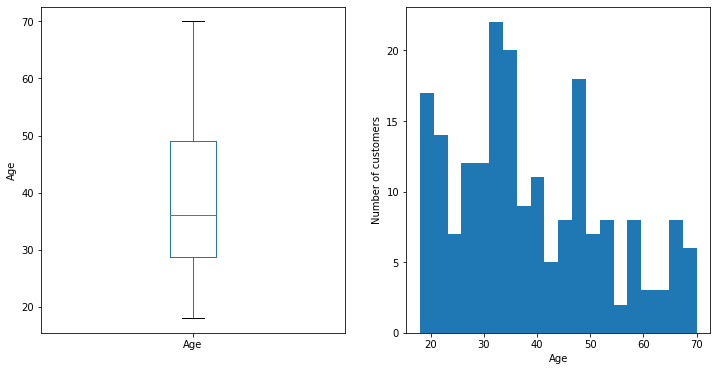

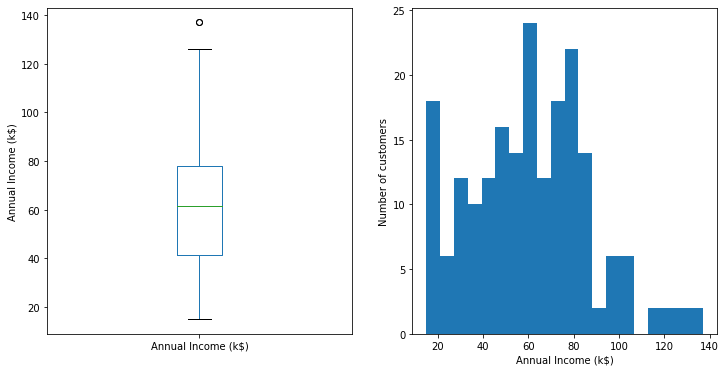

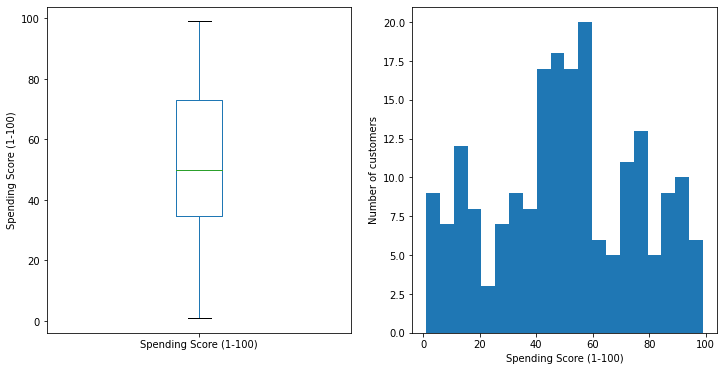

In [13]:
for var in ["Age","Annual Income (k$)","Spending Score (1-100)"] :
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    fig = data1.boxplot(column=var,grid=False)
    fig.set_title("")
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data1[var].hist(bins=20,grid=False)
    fig.set_ylabel("Number of customers")
    fig.set_xlabel(var)

    plt.show()

seems quite Normal distribution

### check correlation among  variables(Bivariate)

In [14]:
data1.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


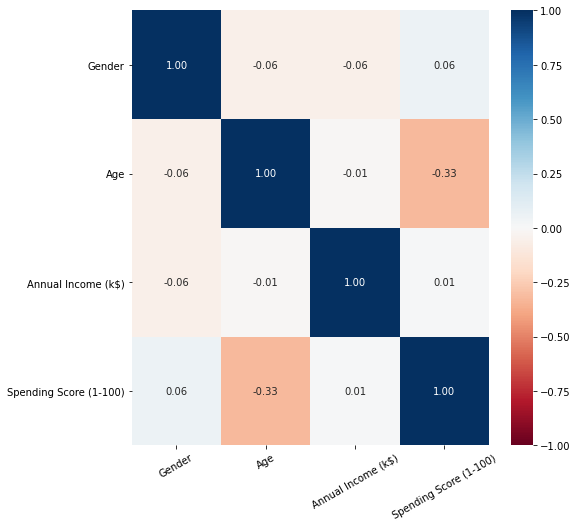

In [15]:
plt.figure(figsize=(8,8))
s=sns.heatmap(data1.corr(),annot=True,cmap="RdBu",vmin=-1,vmax=1,fmt=".2f")
s.set_yticklabels(s.get_yticklabels(),rotation=0)
s.set_xticklabels(s.get_xticklabels(),rotation=30)
plt.show()

**Age** and **Spending Score** (1-100) has medium negative correlation.

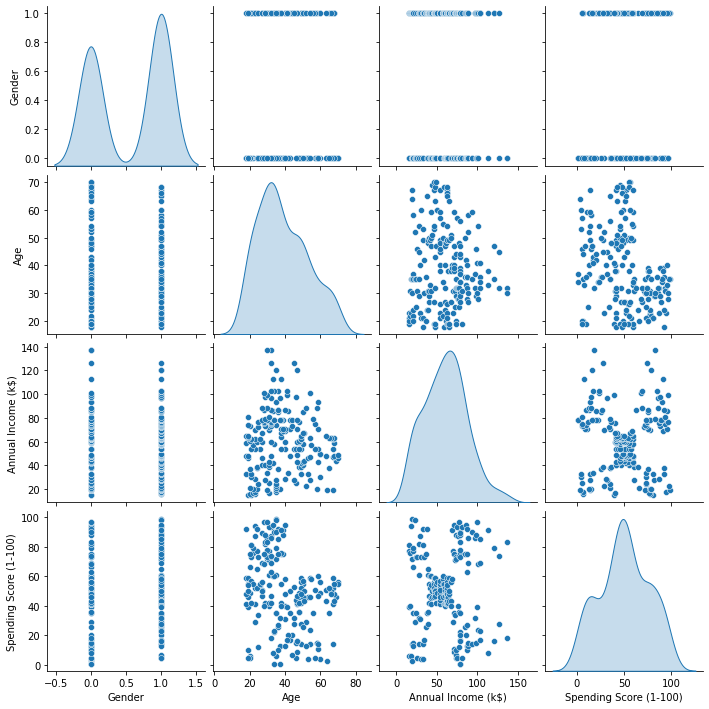

In [16]:
sns.pairplot(data1,diag_kind="kde")
plt.show()

## Part2 :  K-Means Clustering 

In [17]:
# standard data
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
data_std = scaler.fit_transform(data1[["Age","Annual Income (k$)","Spending Score (1-100)"]])

In [18]:
data_std=pd.DataFrame(data_std,columns=data1.columns[1:],index=data1.index)

In [19]:
data_std.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [20]:
data_std["Gender"] = data1["Gender"]

In [21]:
data_std.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


### Elbow Criterion Method for K-Means

In [22]:
from sklearn.cluster import KMeans

# Fit KMeans and calculate SSE for each k
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = 1234,n_init=10,max_iter=300)
    kmeans.fit(data_std)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

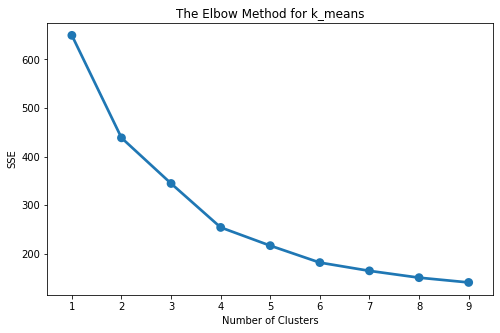

In [23]:
# Plot SSE for each k
plt.figure(figsize=(8,5))
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("The Elbow Method for k_means")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,init = "k-means++", random_state = 1234,n_init=10,max_iter=300)
kmeans.fit(data_std)

KMeans(n_clusters=4, random_state=1234)

### silhouette Criterion Method for K-Means

In [25]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data_std, kmeans.labels_, metric="euclidean"))

0.35027020434653977


### K-Means Clustering Analysis

In [26]:
data_segment_kmeans = data1.copy()
data_segment_kmeans["segment k-means"] = kmeans.labels_

In [27]:
data_segment_kmeans.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),segment k-means
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,2
3,1,23,16,77,2
4,1,31,17,40,2


In [28]:
data_segment_analysis = data_segment_kmeans.groupby(["segment k-means"]).mean()

In [29]:
data_segment_analysis

,Gender,Age,Annual Income (k$),Spending Score (1-100)
segment k-means,,,,
0,0.500000,39.368421,86.500000,19.578947
1,0.550000,32.875000,86.100000,81.525000
2,0.596491,25.438596,40.000000,60.298246
3,0.569231,53.984615,47.707692,39.969231


- cluster 0:  middle aged,very careful with money.**The frugal spender.**


- cluster 1:  middle-aged,pend large amounts of money.**Highly affluent individuals**


- cluster 2:   younger age group,very high spenders.**The careless buyer.**


- cluster 3:  oldest people. earn less and spend less.**Almost retired.**

In [30]:
data_segment_analysis["N Obs"] = data_segment_kmeans[["segment k-means" , "Gender"]].groupby(["segment k-means"]).count()

In [31]:
data_segment_analysis["Prob Obs"] =data_segment_analysis["N Obs"] / data_segment_analysis["N Obs"].sum()

In [32]:
data_segment_analysis

,Gender,Age,Annual Income (k$),Spending Score (1-100),N Obs,Prob Obs
segment k-means,,,,,,
0,0.500000,39.368421,86.500000,19.578947,38,0.190
1,0.550000,32.875000,86.100000,81.525000,40,0.200
2,0.596491,25.438596,40.000000,60.298246,57,0.285
3,0.569231,53.984615,47.707692,39.969231,65,0.325


In [33]:
data_segment_analysis.rename({0:"The frugal spender",
                              1:"Highly affluent individuals",
                              2:"The careless buyer",
                              3:"Almost retired"})                           

,Gender,Age,Annual Income (k$),Spending Score (1-100),N Obs,Prob Obs
segment k-means,,,,,,
The frugal spender,0.500000,39.368421,86.500000,19.578947,38,0.190
Highly affluent individuals,0.550000,32.875000,86.100000,81.525000,40,0.200
The careless buyer,0.596491,25.438596,40.000000,60.298246,57,0.285
Almost retired,0.569231,53.984615,47.707692,39.969231,65,0.325


In [34]:
data_segment_kmeans["Labels"] = data_segment_kmeans["segment k-means"].replace({0:"The frugal spender",
                                                                                1:"Highly affluent individuals",
                                                                                2:"The careless buyer",
                                                                                3:"Almost retired"})

In [35]:
data_segment_kmeans.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),segment k-means,Labels
0,0,19,15,39,2,The careless buyer
1,0,21,15,81,2,The careless buyer
2,1,20,16,6,2,The careless buyer
3,1,23,16,77,2,The careless buyer
4,1,31,17,40,2,The careless buyer
5,1,22,17,76,2,The careless buyer
6,1,35,18,6,3,Almost retired
7,1,23,18,94,2,The careless buyer
8,0,64,19,3,3,Almost retired
9,1,30,19,72,2,The careless buyer


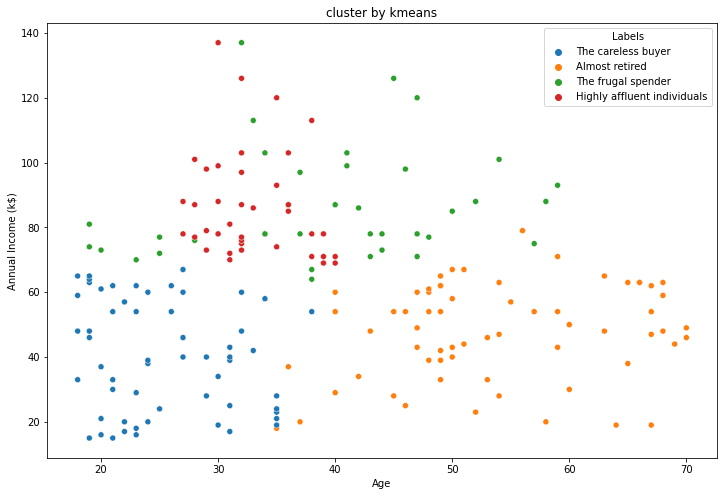

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_segment_kmeans["Age"],y=data_segment_kmeans["Annual Income (k$)"],hue=data_segment_kmeans["Labels"])
plt.title("cluster by kmeans")
plt.show()

### Part3 :  K-Means Clustering based on PCA

In [37]:
from sklearn.decomposition import PCA

pca=PCA()

In [38]:
pca.fit(data_std)

PCA()

In [39]:
pca.explained_variance_ratio_

array([0.4095285 , 0.3081674 , 0.20723465, 0.07506945])

### Check Number of Components

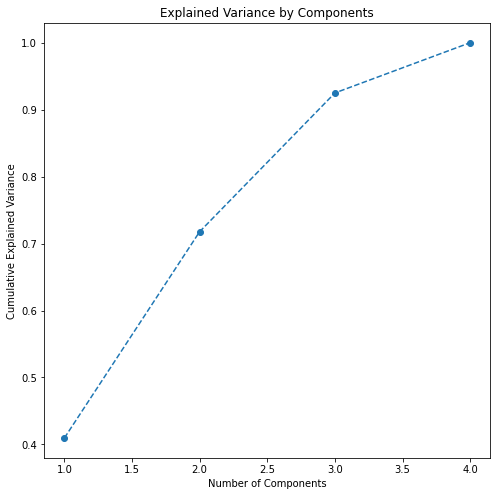

In [40]:
plt.figure(figsize=(8,8))
plt.plot(range(1,5),pca.explained_variance_ratio_.cumsum(),marker="o",linestyle="--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [41]:
pca=PCA(n_components=2)

scores_pca= pca.fit_transform(data_std)

### Elbow Criterion Method for PCA K-Means

In [42]:
sse = {}
for k in range(1, 10):
    kmeans_pca = KMeans(n_clusters = k, init = "k-means++", random_state = 1234,n_init=10,max_iter=300)
    kmeans_pca.fit(scores_pca)
    sse[k] = kmeans_pca.inertia_ 

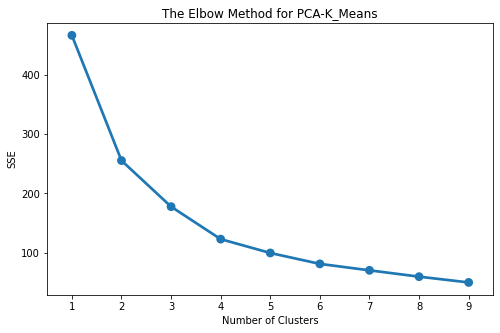

In [43]:
# Plot SSE for each k
plt.figure(figsize=(8,5))
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("The Elbow Method for PCA-K_Means")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [44]:
kmeans_pca = KMeans(n_clusters=4,init = "k-means++", random_state = 1234,n_init=10,max_iter=300)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=1234)

### silhouette Criterion Method for PCA K-Means

In [45]:
print(silhouette_score(scores_pca, kmeans_pca.labels_, metric="euclidean"))

0.4232584673975906


**Improvement in silhouette score**

In [46]:
data_segm_pca_kmeans = pd.concat([data1.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
data_segm_pca_kmeans.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),0,1
0,0,19,15,39,-0.600438,-1.737179
1,0,21,15,81,-1.649886,-1.789124
2,1,20,16,6,0.315381,-1.692772
3,1,23,16,77,-1.477989,-1.781317
4,1,31,17,40,-0.060545,-1.678691


In [47]:
data_segm_pca_kmeans.columns.values[-2:] =["Component 1" , "Component 2"]
data_segm_pca_kmeans.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Component 1,Component 2
0,0,19,15,39,-0.600438,-1.737179
1,0,21,15,81,-1.649886,-1.789124
2,1,20,16,6,0.315381,-1.692772
3,1,23,16,77,-1.477989,-1.781317
4,1,31,17,40,-0.060545,-1.678691


In [48]:
data_segm_pca_kmeans["Segment K-Means PCA"] = kmeans_pca.labels_

In [49]:
data_segm_pca_kmeans.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Component 1,Component 2,Segment K-Means PCA
0,0,19,15,39,-0.600438,-1.737179,3
1,0,21,15,81,-1.649886,-1.789124,3
2,1,20,16,6,0.315381,-1.692772,1
3,1,23,16,77,-1.477989,-1.781317,3
4,1,31,17,40,-0.060545,-1.678691,3


### K-Means Clustering based on PCA Analysis

In [50]:
data_segm_pca_kmeans_freq = data_segm_pca_kmeans.groupby(["Segment K-Means PCA"]).mean()

In [51]:
data_segm_pca_kmeans_freq

,Gender,Age,Annual Income (k$),Spending Score (1-100),Component 1,Component 2
Segment K-Means PCA,,,,,,
0,0.576271,29.932203,78.661017,70.491525,-1.039269,0.644981
1,0.579710,52.144928,46.333333,40.072464,0.974627,-0.503863
2,0.428571,41.685714,88.228571,17.285714,1.003326,1.108628
3,0.621622,25.594595,32.054054,67.864865,-1.109427,-1.137550


- cluster 0 : Highly affluent individuals.


- cluster 1 : Almost retired.


- cluster 2 : The frugal spender.


- cluster 3 : The careless buyer.

In [52]:
data_segm_pca_kmeans_freq["N Obs"] = data_segm_pca_kmeans[["Segment K-Means PCA" , "Gender"]].groupby(["Segment K-Means PCA"]).count()

data_segm_pca_kmeans_freq["Prob Obs"] =data_segm_pca_kmeans_freq["N Obs"] / data_segm_pca_kmeans_freq["N Obs"].sum()

In [53]:
data_segm_pca_kmeans_freq

,Gender,Age,Annual Income (k$),Spending Score (1-100),Component 1,Component 2,N Obs,Prob Obs
Segment K-Means PCA,,,,,,,,
0,0.576271,29.932203,78.661017,70.491525,-1.039269,0.644981,59,0.295
1,0.579710,52.144928,46.333333,40.072464,0.974627,-0.503863,69,0.345
2,0.428571,41.685714,88.228571,17.285714,1.003326,1.108628,35,0.175
3,0.621622,25.594595,32.054054,67.864865,-1.109427,-1.137550,37,0.185


In [54]:
data_segm_pca_kmeans_freq = data_segm_pca_kmeans_freq.rename({0:"Highly affluent individuals",
                                                              1:"Almost retired",
                                                              2:"The frugal spender",
                                                              3:"The careless buyer"})  

In [55]:
data_segm_pca_kmeans_freq

,Gender,Age,Annual Income (k$),Spending Score (1-100),Component 1,Component 2,N Obs,Prob Obs
Segment K-Means PCA,,,,,,,,
Highly affluent individuals,0.576271,29.932203,78.661017,70.491525,-1.039269,0.644981,59,0.295
Almost retired,0.579710,52.144928,46.333333,40.072464,0.974627,-0.503863,69,0.345
The frugal spender,0.428571,41.685714,88.228571,17.285714,1.003326,1.108628,35,0.175
The careless buyer,0.621622,25.594595,32.054054,67.864865,-1.109427,-1.137550,37,0.185


In [56]:
data_segm_pca_kmeans["Labels"] = data_segm_pca_kmeans["Segment K-Means PCA"].replace({0:"Highly affluent individuals",
                                                                                      1:"Almost retired",
                                                                                      2:"The frugal spender",
                                                                                      3:"The careless buyer"})

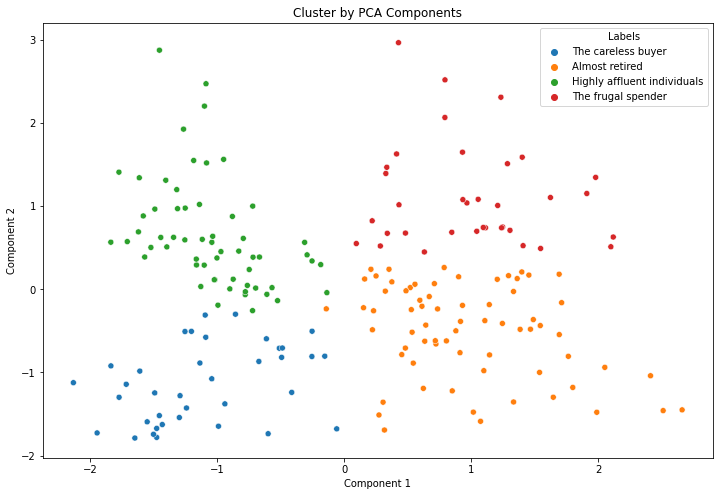

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_segm_pca_kmeans["Component 1"],
                y=data_segm_pca_kmeans["Component 2"],
                hue=data_segm_pca_kmeans["Labels"])
               

plt.title("Cluster by PCA Components")
plt.show()

In [58]:
data_segm_pca_kmeans["CustomerID"] = data["CustomerID"]

In [59]:
data_segm_pca_kmeans

,Gender,Age,Annual Income (k$),Spending Score (1-100),Component 1,Component 2,Segment K-Means PCA,Labels,CustomerID
0,0,19,15,39,-0.600438,-1.737179,3,The careless buyer,1
1,0,21,15,81,-1.649886,-1.789124,3,The careless buyer,2
2,1,20,16,6,0.315381,-1.692772,1,Almost retired,3
3,1,23,16,77,-1.477989,-1.781317,3,The careless buyer,4
4,1,31,17,40,-0.060545,-1.678691,3,The careless buyer,5
...,...,...,...,...,...,...,...,...,...
195,1,35,120,79,-1.101819,2.201867,0,Highly affluent individuals,196
196,1,45,126,28,0.792047,2.517450,2,The frugal spender,197
197,0,32,126,74,-1.089706,2.470818,0,Highly affluent individuals,198
198,0,32,137,18,0.425949,2.964343,2,The frugal spender,199


# End of Code #